# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [74]:
library('tidyverse')
library ('ggrepel')

In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [75]:
vacc_data = read_csv('https://github.com/rfordatascience/tidytuesday/raw/refs/heads/master/data/2020/2020-02-25/measles.csv',
               show_col_types = FALSE 
            )

vacc_data |> glimpse()

Rows: 66,113
Columns: 16
$ index    <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 11, 12, 13, 14, 15, 15, 16…
$ state    <chr> "Arizona", "Arizona", "Arizona", "Arizona", "Arizona", "Arizo…
$ year     <chr> "2018-19", "2018-19", "2018-19", "2018-19", "2018-19", "2018-…
$ name     <chr> "A J Mitchell Elementary", "Academy Del Sol", "Academy Del So…
$ type     <chr> "Public", "Charter", "Charter", "Charter", "Charter", "Public…
$ city     <chr> "Nogales", "Tucson", "Tucson", "Phoenix", "Phoenix", "Phoenix…
$ county   <chr> "Santa Cruz", "Pima", "Pima", "Maricopa", "Maricopa", "Marico…
$ district <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ enroll   <dbl> 51, 22, 85, 60, 43, 36, 24, 22, 26, 78, 78, 35, 54, 54, 34, 5…
$ mmr      <dbl> 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1…
$ overall  <dbl> -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -…
$ xrel     <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ xmed     <dbl

The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [76]:
# create the df_vacc_rates here

df_vacc_rates = 

vacc_data |> 
    filter(mmr >= 0) |>
    group_by(state) |>
    summarize(Fraction_above_95 = sum(mmr >= 95, na.rm = TRUE)/n())|>
    #*100 can add after n() for percentage 
    arrange(Fraction_above_95)

df_vacc_rates 

state,Fraction_above_95
<chr>,<dbl>
Arkansas,0.003527337
Washington,0.326592518
North Dakota,0.455555556
Maine,0.473389356
Minnesota,0.473948525
Ohio,0.491606715
Arizona,0.506404782
Oregon,0.593052109
Colorado,0.623092236


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

 **Arkansas** has the smallest fraction of schools above the CDC target vaccination rate of 95%

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `mutate`, and `cume_dist`.

In [121]:
#Create new df, filter for NC, mutate to get distribution 

nc_vacc = vacc_data |>
    filter(state == 'North Carolina') |>
    mutate(cumulative_dist_overall = cume_dist(overall)) 

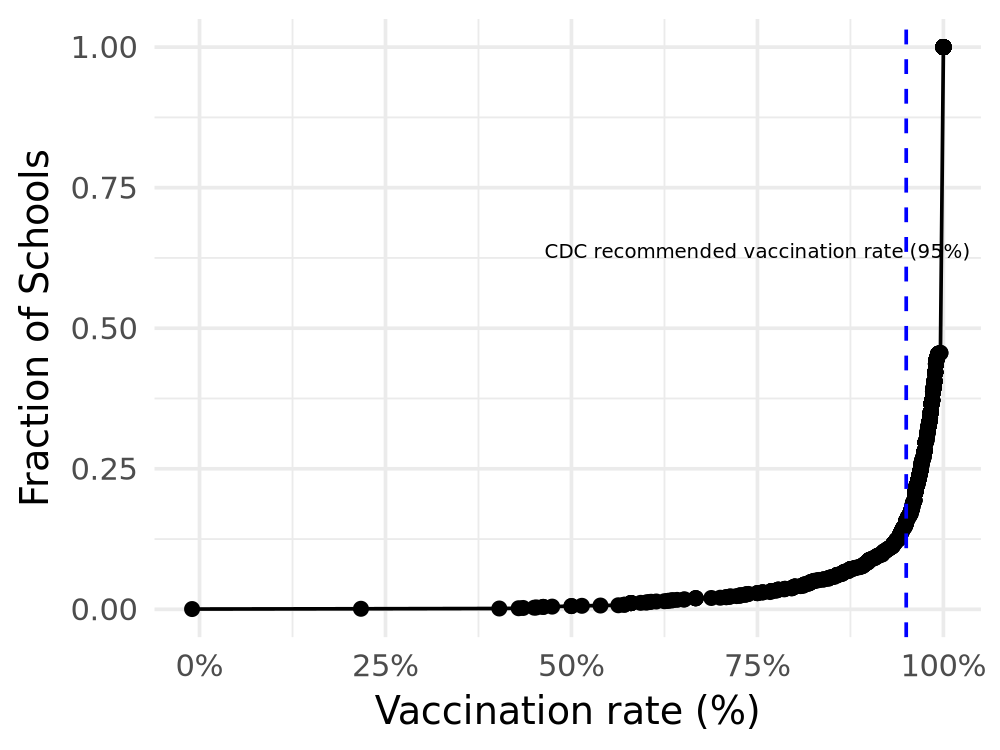

In [122]:
#cume_dist in 05_ecdf_plots 
#geom_text_repel in 06_adjusting_plot_appearance
#ecdf means y-axis is percent value of x-axis overall, presents distribution  
#can also use geom_text for non-static labels, see 07_marathon, used annotate for static
#unsure how to wrap annotation and add arrow 
#theme minimal to remove gray background and excess lines 

ggplot(nc_vacc, aes(x = overall, y = cumulative_dist_overall)) + 
    geom_point() +
    geom_line() +  
    geom_vline(xintercept = 95, linetype = "dashed", color = "blue")+
     scale_x_continuous(labels = scales::number_format(suffix = "%")) +
    annotate("text", x = 75, y = 0.6, label = "CDC recommended vaccination rate (95%)", vjust = -1, size = 2)+
    labs(y = "Fraction of Schools", x = "Vaccination rate (%)")+
    theme_minimal() 


(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it. I used `geom_text_repel` from [ggrepel](https://cran.r-project.org/web/packages/ggrepel/vignettes/ggrepel.html) fo the annotation.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/2023/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [120]:
nc_vacc |>
summarize(median_nc = median(overall))

median_nc
<dbl>
100


**Yes** the median vacc rate for NC schools is 100% which is above the CDC reccommended target of 95%